## You need to run all cells first to see the notebook in action
Hint: just select icon with two arrows pointing to the right to "Restart the kernel and run all cells"

Note: you may need to restart the kernel to use updated packages.
Solution took 0.001 sec


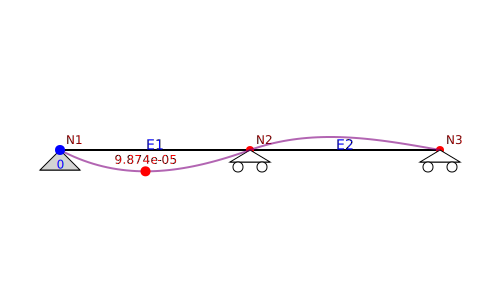

In [5]:
%pip install drawsvg
import sys
sys.path.append("../flip")


import numpy
import drawsvg

from flip import (
    Domain, Solver,
    Material, CrossSection, Node, Beam2D, DofID,
    UniformDistributedLoad,
    PointLoadOnElement,
    plot_model_drawsvg, plot_internal_forces_on_structure,
)


# Create solver
sol = Solver()
dom = sol.domain

# Create materials and cross sections
dom.add_material(Material("C30", e=30e9, g=12e9))
dom.add_cs(CrossSection("rect", a=0.3*0.5, iy=0.3*0.5**3/12, k=1.0e32, rho=25e3))   

# Create nodes
dom.add_node(Node(1, dom, coords=[0.0, 0.0, 0.0], bcs=[DofID.Dx, DofID.Dz]))
dom.add_node(Node(2, dom, coords=[4.0, 0.0, 0.0], bcs=[DofID.Dz]))
dom.add_node(Node(3, dom, coords=[8.0, 0.0, 0.0], bcs=[DofID.Dz]))

# Create elements
dom.add_element(Beam2D(1, dom, nodes=[1, 2], mat="C30", cs="rect"))
dom.add_element(Beam2D(2, dom, nodes=[2, 3], mat="C30", cs="rect"))

# loads
dom.apply_element_load(1, UniformDistributedLoad(fz=4000.0)) 
dom.apply_element_load(1, PointLoadOnElement(fz=4000.0,a=2.0))

# solve
sol.solve()

# Plot model geometry (and optionally deformed shape), SVG outputs
plot_model_drawsvg(dom, "simple_beam_model.svg", width_px=500, height_px=300, show_deformed=True, deform_scale=6000, margin=60)
#plot_model_diagram(dom, "V", "simple_beam_shear.svg")



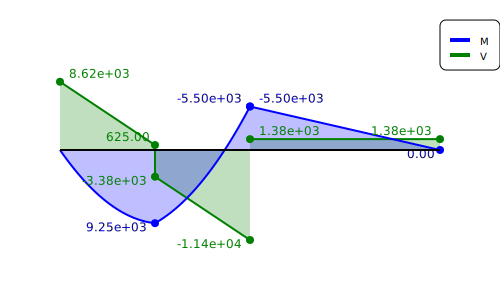

In [6]:
# Plot internal force diagrams, SVG outputs
plot_internal_forces_on_structure(dom, "simple_beam_moment.svg", width_px=500, height_px=300, margin=60, diagrams=["M", "V"] , scale=1.0)